<a href="https://colab.research.google.com/github/amankishore54/Stroke-prediction-test/blob/main/Stroke%20prediction%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke healthcare prediction analysis





## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 12,6

## Importing the dataset

In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
dataset.shape

(5110, 12)

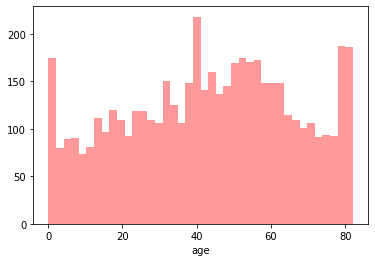

<Figure size 1152x576 with 0 Axes>

In [5]:
sns.distplot(dataset['age'], kde=False, color='red', bins=40)
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.show()

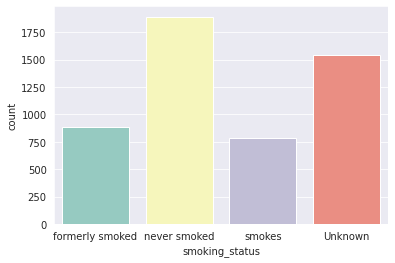

In [6]:
sns.countplot(data=dataset, x="smoking_status", palette="Set3")
plt.show()

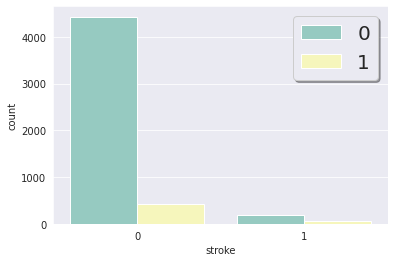

In [7]:
sns.countplot(dataset['stroke'], hue=dataset['hypertension'], palette="Set3")
plt.legend(fontsize=20, frameon=True, fancybox=True, shadow=True, framealpha=1)
plt.show()

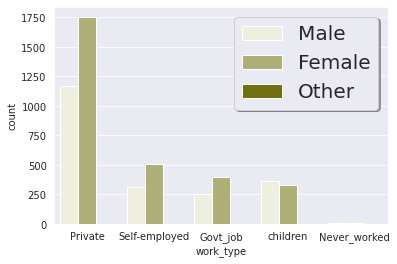

In [8]:
sns.countplot(x="work_type", hue="gender", data=dataset, color = 'olive')
sns.set_style('darkgrid')
plt.legend(fontsize=20, frameon=True, fancybox=True, shadow=True, framealpha=1, loc="upper right")
plt.show()

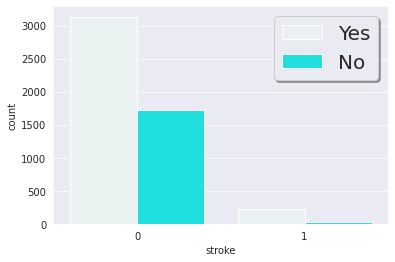

In [9]:
sns.countplot(dataset['stroke'], hue=dataset['ever_married'], color='cyan')
plt.legend(fontsize=20, frameon=True, fancybox=True, shadow=True, framealpha=1)
sns.set_style('darkgrid')
plt.show() 

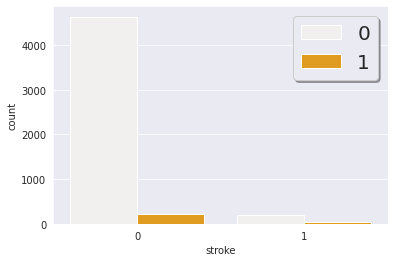

In [10]:
sns.countplot(dataset['stroke'], hue=dataset['heart_disease'], color='orange')
plt.legend(fontsize=20, frameon=True, fancybox=True, shadow=True, framealpha=1)
sns.set_style('darkgrid')
plt.show()

In [11]:
dataset = dataset.drop("id", axis='columns')

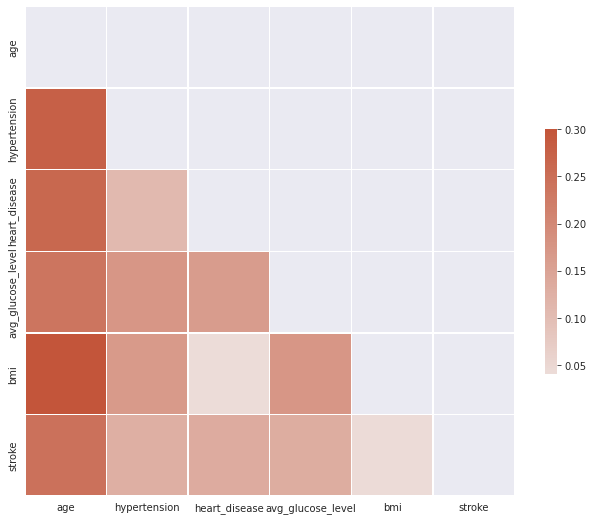

In [12]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.set_style("white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#Encoding categorical features

In [13]:
objList = dataset.select_dtypes(include = "object").columns
print (objList)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    dataset[feat] = le.fit_transform(dataset[feat].astype(str))

print (dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB
None


In [15]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


#Dealing with missing values in 'bmi' column 



In [16]:
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

In [17]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [19]:
print(X)

[[  1.          67.           0.         ... 228.69        36.6
    1.        ]
 [  0.          61.           0.         ... 202.21        28.89323691
    2.        ]
 [  1.          80.           0.         ... 105.92        32.5
    2.        ]
 ...
 [  0.          35.           0.         ...  82.99        30.6
    2.        ]
 [  1.          51.           0.         ... 166.29        25.6
    1.        ]
 [  0.          44.           0.         ...  85.28        26.2
    0.        ]]


## Splitting the dataset into the Training set and Test set

In [20]:
print(y)

[1 1 1 ... 0 0 0]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Random Forest Classification model on the Training set

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=0)

## Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1212    1]
 [  62    3]]


0.9507042253521126

#Applying k-Fold Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.89 %
Standard Deviation: 0.27 %


# *Making the predictions and evaluating the model*

In [26]:
print(classifier.predict(sc.transform([[45246,1,60,0,0,1,1,0,89.22,37.8]])))

[0]
